# Starting off:

### In machine learning what is the difference between an  algorithm and a model?

The algorithm helps us determine the best model.






# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

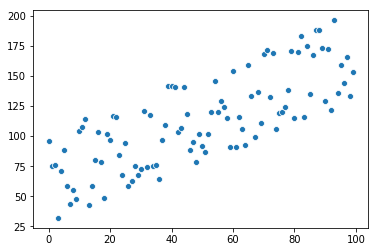

In [5]:
sns.scatterplot(x=x[:,1], y=y)

In [ ]:
numEpochs= 5000
alpha = 0.0005
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

Iteration 0 | Cost: 1012.809961
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 866.612296
[1.92331966 2.17296449]
Iteration 2 | Cost: 806.261429
[1.92487096 1.76264898]
Iteration 3 | Cost: 781.307116
[1.93657679 2.02593057]
Iteration 4 | Cost: 770.947603
[1.94176055 1.85667989]
Iteration 5 | Cost: 766.605867
[1.95113067 1.96516822]
Iteration 6 | Cost: 764.745411
[1.95781102 1.89531392]
Iteration 7 | Cost: 763.908060
[1.96621693 1.93997758]
Iteration 8 | Cost: 763.492575
[1.97351321 1.91110663]
Iteration 9 | Cost: 763.251054
[1.98152039 1.92945398]
Iteration 10 | Cost: 763.081278
[1.98906948 1.91748139]
Iteration 11 | Cost: 762.941103
[1.99691111 1.92497796]
Iteration 12 | Cost: 762.813151
[2.00456328 1.91997296]
Iteration 13 | Cost: 762.690256
[2.0123355  1.92299552]
Iteration 14 | Cost: 762.569465
[2.02002902 1.92086343]
Iteration 15 | Cost: 762.449558
[2.02777147 1.92204129]
Iteration 16 | Cost: 762.330034
[2.03548089 1.92109377]
Iteration 17 | Cost: 762.210686
[2.04320991 1.92151103]
I

Iteration 315 | Cost: 727.989729
[4.3009644  1.88726317]
Iteration 316 | Cost: 727.879194
[4.30839798 1.8871511 ]
Iteration 317 | Cost: 727.768688
[4.31583063 1.88703904]
Iteration 318 | Cost: 727.658209
[4.32326233 1.886927  ]
Iteration 319 | Cost: 727.547759
[4.33069308 1.88681497]
Iteration 320 | Cost: 727.437337
[4.3381229  1.88670295]
Iteration 321 | Cost: 727.326942
[4.34555177 1.88659095]
Iteration 322 | Cost: 727.216576
[4.3529797  1.88647896]
Iteration 323 | Cost: 727.106238
[4.36040668 1.88636699]
Iteration 324 | Cost: 726.995927
[4.36783273 1.88625503]
Iteration 325 | Cost: 726.885645
[4.37525783 1.88614308]
Iteration 326 | Cost: 726.775390
[4.38268199 1.88603115]
Iteration 327 | Cost: 726.665164
[4.39010521 1.88591924]
Iteration 328 | Cost: 726.554966
[4.39752749 1.88580734]
Iteration 329 | Cost: 726.444795
[4.40494882 1.88569545]
Iteration 330 | Cost: 726.334653
[4.41236921 1.88558357]
Iteration 331 | Cost: 726.224538
[4.41978867 1.88547171]
Iteration 332 | Cost: 726.11445

Iteration 582 | Cost: 699.450876
[6.25261714 1.857839  ]
Iteration 583 | Cost: 699.347582
[6.25980315 1.85773066]
Iteration 584 | Cost: 699.244314
[6.26698824 1.85762233]
Iteration 585 | Cost: 699.141072
[6.27417243 1.85751402]
Iteration 586 | Cost: 699.037856
[6.2813557  1.85740572]
Iteration 587 | Cost: 698.934667
[6.28853806 1.85729744]
Iteration 588 | Cost: 698.831503
[6.29571951 1.85718916]
Iteration 589 | Cost: 698.728366
[6.30290005 1.85708091]
Iteration 590 | Cost: 698.625255
[6.31007968 1.85697266]
Iteration 591 | Cost: 698.522170
[6.31725839 1.85686443]
Iteration 592 | Cost: 698.419112
[6.3244362  1.85675622]
Iteration 593 | Cost: 698.316079
[6.3316131  1.85664801]
Iteration 594 | Cost: 698.213073
[6.33878908 1.85653982]
Iteration 595 | Cost: 698.110092
[6.34596416 1.85643165]
Iteration 596 | Cost: 698.007138
[6.35313832 1.85632349]
Iteration 597 | Cost: 697.904210
[6.36031158 1.85621534]
Iteration 598 | Cost: 697.801308
[6.36748393 1.8561072 ]
Iteration 599 | Cost: 697.69843

Iteration 945 | Cost: 663.625421
[8.80214773 1.81940089]
Iteration 946 | Cost: 663.531215
[8.80901031 1.81929743]
Iteration 947 | Cost: 663.437033
[8.81587203 1.81919398]
Iteration 948 | Cost: 663.342875
[8.82273287 1.81909054]
Iteration 949 | Cost: 663.248742
[8.82959284 1.81898712]
Iteration 950 | Cost: 663.154632
[8.83645195 1.8188837 ]
Iteration 951 | Cost: 663.060545
[8.84331018 1.81878031]
Iteration 952 | Cost: 662.966483
[8.85016754 1.81867692]
Iteration 953 | Cost: 662.872445
[8.85702404 1.81857355]
Iteration 954 | Cost: 662.778430
[8.86387966 1.81847019]
Iteration 955 | Cost: 662.684440
[8.87073441 1.81836684]
Iteration 956 | Cost: 662.590473
[8.8775883  1.81826351]
Iteration 957 | Cost: 662.496530
[8.88444131 1.81816019]
Iteration 958 | Cost: 662.402610
[8.89129346 1.81805688]
Iteration 959 | Cost: 662.308715
[8.89814474 1.81795359]
Iteration 960 | Cost: 662.214844
[8.90499514 1.81785031]
Iteration 961 | Cost: 662.120996
[8.91184468 1.81774704]
Iteration 962 | Cost: 662.02717

Iteration 1283 | Cost: 633.107217
[11.07281755  1.78516705]
Iteration 1284 | Cost: 633.020754
[11.07939209  1.78506792]
Iteration 1285 | Cost: 632.934312
[11.08596579  1.78496882]
Iteration 1286 | Cost: 632.847893
[11.09253866  1.78486972]
Iteration 1287 | Cost: 632.761495
[11.0991107   1.78477064]
Iteration 1288 | Cost: 632.675120
[11.1056819   1.78467156]
Iteration 1289 | Cost: 632.588766
[11.11225227  1.78457251]
Iteration 1290 | Cost: 632.502435
[11.1188218   1.78447346]
Iteration 1291 | Cost: 632.416125
[11.12539051  1.78437443]
Iteration 1292 | Cost: 632.329837
[11.13195838  1.78427541]
Iteration 1293 | Cost: 632.243571
[11.13852541  1.7841764 ]
Iteration 1294 | Cost: 632.157327
[11.14509161  1.7840774 ]
Iteration 1295 | Cost: 632.071104
[11.15165698  1.78397842]
Iteration 1296 | Cost: 631.984904
[11.15822152  1.78387945]
Iteration 1297 | Cost: 631.898725
[11.16478522  1.78378049]
Iteration 1298 | Cost: 631.812569
[11.17134809  1.78368155]
Iteration 1299 | Cost: 631.726434
[11.17

[12.15928527  1.76878687]
Iteration 1451 | Cost: 618.884824
[12.16572198  1.76868983]
Iteration 1452 | Cost: 618.801969
[12.17215788  1.7685928 ]
Iteration 1453 | Cost: 618.719135
[12.17859296  1.76849578]
Iteration 1454 | Cost: 618.636321
[12.18502722  1.76839877]
Iteration 1455 | Cost: 618.553529
[12.19146067  1.76830178]
Iteration 1456 | Cost: 618.470758
[12.1978933   1.76820479]
Iteration 1457 | Cost: 618.388008
[12.20432511  1.76810782]
Iteration 1458 | Cost: 618.305279
[12.21075611  1.76801087]
Iteration 1459 | Cost: 618.222571
[12.2171863   1.76791392]
Iteration 1460 | Cost: 618.139884
[12.22361567  1.76781699]
Iteration 1461 | Cost: 618.057218
[12.23004422  1.76772007]
Iteration 1462 | Cost: 617.974573
[12.23647196  1.76762316]
Iteration 1463 | Cost: 617.891949
[12.24289888  1.76752627]
Iteration 1464 | Cost: 617.809345
[12.24932498  1.76742938]
Iteration 1465 | Cost: 617.726763
[12.25575027  1.76733251]
Iteration 1466 | Cost: 617.644202
[12.26217475  1.76723565]
Iteration 1467

Iteration 1594 | Cost: 607.247437
[13.07781519  1.75493861]
Iteration 1595 | Cost: 607.167534
[13.08413538  1.75484333]
Iteration 1596 | Cost: 607.087652
[13.09045477  1.75474805]
Iteration 1597 | Cost: 607.007789
[13.09677336  1.75465279]
Iteration 1598 | Cost: 606.927948
[13.10309115  1.75455754]
Iteration 1599 | Cost: 606.848126
[13.10940813  1.7544623 ]
Iteration 1600 | Cost: 606.768324
[13.11572432  1.75436708]
Iteration 1601 | Cost: 606.688543
[13.1220397   1.75427186]
Iteration 1602 | Cost: 606.608782
[13.12835428  1.75417666]
Iteration 1603 | Cost: 606.529041
[13.13466806  1.75408147]
Iteration 1604 | Cost: 606.449321
[13.14098104  1.75398629]
Iteration 1605 | Cost: 606.369621
[13.14729322  1.75389113]
Iteration 1606 | Cost: 606.289941
[13.1536046   1.75379597]
Iteration 1607 | Cost: 606.210281
[13.15991518  1.75370083]
Iteration 1608 | Cost: 606.130641
[13.16622496  1.7536057 ]
Iteration 1609 | Cost: 606.051022
[13.17253393  1.75351058]
Iteration 1610 | Cost: 605.971422
[13.17

Iteration 1758 | Cost: 594.410652
[14.10368357  1.73947207]
Iteration 1759 | Cost: 594.334006
[14.10987363  1.73937874]
Iteration 1760 | Cost: 594.257379
[14.1160629   1.73928543]
Iteration 1761 | Cost: 594.180772
[14.12225138  1.73919213]
Iteration 1762 | Cost: 594.104184
[14.12843908  1.73909884]
Iteration 1763 | Cost: 594.027616
[14.134626    1.73900556]
Iteration 1764 | Cost: 593.951067
[14.14081213  1.7389123 ]
Iteration 1765 | Cost: 593.874537
[14.14699747  1.73881904]
Iteration 1766 | Cost: 593.798027
[14.15318203  1.7387258 ]
Iteration 1767 | Cost: 593.721537
[14.15936581  1.73863257]
Iteration 1768 | Cost: 593.645065
[14.1655488   1.73853935]
Iteration 1769 | Cost: 593.568613
[14.17173101  1.73844615]
Iteration 1770 | Cost: 593.492181
[14.17791243  1.73835295]
Iteration 1771 | Cost: 593.415768
[14.18409307  1.73825977]
Iteration 1772 | Cost: 593.339374
[14.19027292  1.7381666 ]
Iteration 1773 | Cost: 593.263000
[14.196452    1.73807344]
Iteration 1774 | Cost: 593.186645
[14.20

Iteration 1991 | Cost: 577.067539
[15.52494872  1.7180443 ]
Iteration 1992 | Cost: 576.995292
[15.53095848  1.7179537 ]
Iteration 1993 | Cost: 576.923065
[15.53696747  1.7178631 ]
Iteration 1994 | Cost: 576.850855
[15.54297571  1.71777252]
Iteration 1995 | Cost: 576.778664
[15.54898318  1.71768195]
Iteration 1996 | Cost: 576.706491
[15.55498989  1.71759139]
Iteration 1997 | Cost: 576.634336
[15.56099584  1.71750084]
Iteration 1998 | Cost: 576.562200
[15.56700103  1.7174103 ]
Iteration 1999 | Cost: 576.490082
[15.57300545  1.71731977]
Iteration 2000 | Cost: 576.417982
[15.57900912  1.71722926]
Iteration 2001 | Cost: 576.345900
[15.58501202  1.71713876]
Iteration 2002 | Cost: 576.273837
[15.59101416  1.71704827]
Iteration 2003 | Cost: 576.201792
[15.59701554  1.71695779]
Iteration 2004 | Cost: 576.129766
[15.60301616  1.71686732]
Iteration 2005 | Cost: 576.057757
[15.60901601  1.71677686]
Iteration 2006 | Cost: 575.985767
[15.61501511  1.71668641]
Iteration 2007 | Cost: 575.913795
[15.62

[17.50768036  1.68815157]
Iteration 2329 | Cost: 553.663125
[17.5134386   1.68806475]
Iteration 2330 | Cost: 553.596817
[17.51919611  1.68797795]
Iteration 2331 | Cost: 553.530525
[17.52495289  1.68789116]
Iteration 2332 | Cost: 553.464250
[17.53070894  1.68780438]
Iteration 2333 | Cost: 553.397991
[17.53646426  1.68771761]
Iteration 2334 | Cost: 553.331750
[17.54221884  1.68763085]
Iteration 2335 | Cost: 553.265525
[17.5479727  1.6875441]
Iteration 2336 | Cost: 553.199318
[17.55372583  1.68745736]
Iteration 2337 | Cost: 553.133127
[17.55947823  1.68737063]
Iteration 2338 | Cost: 553.066952
[17.5652299   1.68728392]
Iteration 2339 | Cost: 553.000795
[17.57098084  1.68719721]
Iteration 2340 | Cost: 552.934654
[17.57673105  1.68711052]
Iteration 2341 | Cost: 552.868530
[17.58248053  1.68702384]
Iteration 2342 | Cost: 552.802423
[17.58822928  1.68693717]
Iteration 2343 | Cost: 552.736333
[17.5939773   1.68685051]
Iteration 2344 | Cost: 552.670259
[17.59972459  1.68676386]
Iteration 2345 |

[19.33011571  1.66067554]
Iteration 2652 | Cost: 533.096953
[19.33564277  1.66059222]
Iteration 2653 | Cost: 533.035862
[19.34116912  1.6605089 ]
Iteration 2654 | Cost: 532.974786
[19.34669477  1.66042559]
Iteration 2655 | Cost: 532.913726
[19.35221972  1.66034229]
Iteration 2656 | Cost: 532.852682
[19.35774397  1.66025901]
Iteration 2657 | Cost: 532.791652
[19.36326752  1.66017573]
Iteration 2658 | Cost: 532.730639
[19.36879037  1.66009246]
Iteration 2659 | Cost: 532.669641
[19.37431251  1.66000921]
Iteration 2660 | Cost: 532.608658
[19.37983396  1.65992597]
Iteration 2661 | Cost: 532.547691
[19.38535471  1.65984273]
Iteration 2662 | Cost: 532.486739
[19.39087475  1.65975951]
Iteration 2663 | Cost: 532.425802
[19.3963941  1.6596763]
Iteration 2664 | Cost: 532.364882
[19.40191274  1.65959309]
Iteration 2665 | Cost: 532.303976
[19.40743069  1.6595099 ]
Iteration 2666 | Cost: 532.243086
[19.41294793  1.65942672]
Iteration 2667 | Cost: 532.182212
[19.41846448  1.65934355]
Iteration 2668 |

Iteration 2836 | Cost: 522.113146
[20.340779    1.64543824]
Iteration 2837 | Cost: 522.054841
[20.34617785  1.64535684]
Iteration 2838 | Cost: 521.996551
[20.35157601  1.64527546]
Iteration 2839 | Cost: 521.938276
[20.35697348  1.64519408]
Iteration 2840 | Cost: 521.880016
[20.36237028  1.64511272]
Iteration 2841 | Cost: 521.821771
[20.36776638  1.64503136]
Iteration 2842 | Cost: 521.763540
[20.3731618   1.64495002]
Iteration 2843 | Cost: 521.705324
[20.37855654  1.64486868]
Iteration 2844 | Cost: 521.647123
[20.38395059  1.64478736]
Iteration 2845 | Cost: 521.588937
[20.38934396  1.64470605]
Iteration 2846 | Cost: 521.530765
[20.39473664  1.64462474]
Iteration 2847 | Cost: 521.472608
[20.40012864  1.64454345]
Iteration 2848 | Cost: 521.414466
[20.40551996  1.64446217]
Iteration 2849 | Cost: 521.356339
[20.41091059  1.6443809 ]
Iteration 2850 | Cost: 521.298226
[20.41630054  1.64429963]
Iteration 2851 | Cost: 521.240128
[20.42168981  1.64421838]
Iteration 2852 | Cost: 521.182045
[20.42

Iteration 3060 | Cost: 509.415510
[21.53317431  1.62746104]
Iteration 3061 | Cost: 509.360426
[21.5384219   1.62738192]
Iteration 3062 | Cost: 509.305357
[21.54366881  1.62730282]
Iteration 3063 | Cost: 509.250302
[21.54891506  1.62722372]
Iteration 3064 | Cost: 509.195260
[21.55416065  1.62714464]
Iteration 3065 | Cost: 509.140233
[21.55940557  1.62706556]
Iteration 3066 | Cost: 509.085220
[21.56464983  1.6269865 ]
Iteration 3067 | Cost: 509.030220
[21.56989342  1.62690744]
Iteration 3068 | Cost: 508.975235
[21.57513634  1.6268284 ]
Iteration 3069 | Cost: 508.920263
[21.5803786   1.62674936]
Iteration 3070 | Cost: 508.865305
[21.5856202   1.62667034]
Iteration 3071 | Cost: 508.810362
[21.59086113  1.62659132]
Iteration 3072 | Cost: 508.755432
[21.59610139  1.62651232]
Iteration 3073 | Cost: 508.700516
[21.60134099  1.62643332]
Iteration 3074 | Cost: 508.645614
[21.60657993  1.62635434]
Iteration 3075 | Cost: 508.590726
[21.6118182   1.62627536]
Iteration 3076 | Cost: 508.535852
[21.61

Iteration 3420 | Cost: 490.461823
[23.37993146  1.59961833]
Iteration 3421 | Cost: 490.411548
[23.38494477  1.59954274]
Iteration 3422 | Cost: 490.361286
[23.38995744  1.59946717]
Iteration 3423 | Cost: 490.311036
[23.39496948  1.59939161]
Iteration 3424 | Cost: 490.260800
[23.39998089  1.59931605]
Iteration 3425 | Cost: 490.210576
[23.40499166  1.59924051]
Iteration 3426 | Cost: 490.160365
[23.41000179  1.59916497]
Iteration 3427 | Cost: 490.110167
[23.41501129  1.59908945]
Iteration 3428 | Cost: 490.059981
[23.42002015  1.59901393]
Iteration 3429 | Cost: 490.009808
[23.42502837  1.59893842]
Iteration 3430 | Cost: 489.959648
[23.43003596  1.59886293]
Iteration 3431 | Cost: 489.909501
[23.43504292  1.59878744]
Iteration 3432 | Cost: 489.859366
[23.44004924  1.59871196]
Iteration 3433 | Cost: 489.809244
[23.44505492  1.59863649]
Iteration 3434 | Cost: 489.759135
[23.45005997  1.59856103]
Iteration 3435 | Cost: 489.709038
[23.45506439  1.59848558]
Iteration 3436 | Cost: 489.658954
[23.46

Iteration 3791 | Cost: 472.658577
[25.19689363  1.57222482]
Iteration 3792 | Cost: 472.612819
[25.20167645  1.57215271]
Iteration 3793 | Cost: 472.567072
[25.20645866  1.57208061]
Iteration 3794 | Cost: 472.521337
[25.21124027  1.57200852]
Iteration 3795 | Cost: 472.475614
[25.21602127  1.57193644]
Iteration 3796 | Cost: 472.429902
[25.22080166  1.57186437]
Iteration 3797 | Cost: 472.384202
[25.22558145  1.57179231]
Iteration 3798 | Cost: 472.338513
[25.23036063  1.57172026]
Iteration 3799 | Cost: 472.292836
[25.2351392   1.57164821]
Iteration 3800 | Cost: 472.247171
[25.23991717  1.57157618]
Iteration 3801 | Cost: 472.201517
[25.24469453  1.57150415]
Iteration 3802 | Cost: 472.155875
[25.24947129  1.57143213]
Iteration 3803 | Cost: 472.110244
[25.25424744  1.57136012]
Iteration 3804 | Cost: 472.064625
[25.25902298  1.57128813]
Iteration 3805 | Cost: 472.019017
[25.26379792  1.57121614]
Iteration 3806 | Cost: 471.973421
[25.26857225  1.57114416]
Iteration 3807 | Cost: 471.927837
[25.27

Iteration 3987 | Cost: 463.908211
[26.12282625  1.55826496]
Iteration 3988 | Cost: 463.864673
[26.12749161  1.55819462]
Iteration 3989 | Cost: 463.821146
[26.13215638  1.55812429]
Iteration 3990 | Cost: 463.777629
[26.13682055  1.55805397]
Iteration 3991 | Cost: 463.734124
[26.14148414  1.55798366]
Iteration 3992 | Cost: 463.690630
[26.14614713  1.55791336]
Iteration 3993 | Cost: 463.647147
[26.15080953  1.55784307]
Iteration 3994 | Cost: 463.603675
[26.15547134  1.55777278]
Iteration 3995 | Cost: 463.560214
[26.16013256  1.55770251]
Iteration 3996 | Cost: 463.516764
[26.16479319  1.55763224]
Iteration 3997 | Cost: 463.473325
[26.16945322  1.55756199]
Iteration 3998 | Cost: 463.429897
[26.17411267  1.55749174]
Iteration 3999 | Cost: 463.386480
[26.17877152  1.5574215 ]
Iteration 4000 | Cost: 463.343074
[26.18342979  1.55735127]
Iteration 4001 | Cost: 463.299679
[26.18808746  1.55728105]
Iteration 4002 | Cost: 463.256295
[26.19274454  1.55721083]
Iteration 4003 | Cost: 463.212922
[26.19

Iteration 4254 | Cost: 452.667076
[27.34769451  1.53979818]
Iteration 4255 | Cost: 452.626389
[27.35220449  1.53973019]
Iteration 4256 | Cost: 452.585713
[27.3567139  1.5396622]
Iteration 4257 | Cost: 452.545047
[27.36122273  1.53959422]
Iteration 4258 | Cost: 452.504392
[27.36573099  1.53952625]
Iteration 4259 | Cost: 452.463747
[27.37023869  1.53945829]
Iteration 4260 | Cost: 452.423112
[27.3747458   1.53939034]
Iteration 4261 | Cost: 452.382487
[27.37925235  1.5393224 ]
Iteration 4262 | Cost: 452.341873
[27.38375833  1.53925446]
Iteration 4263 | Cost: 452.301269
[27.38826373  1.53918654]
Iteration 4264 | Cost: 452.260675
[27.39276856  1.53911862]
Iteration 4265 | Cost: 452.220092
[27.39727282  1.53905071]
Iteration 4266 | Cost: 452.179519
[27.40177651  1.53898281]
Iteration 4267 | Cost: 452.138956
[27.40627963  1.53891492]
Iteration 4268 | Cost: 452.098403
[27.41078218  1.53884704]
Iteration 4269 | Cost: 452.057861
[27.41528415  1.53877916]
Iteration 4270 | Cost: 452.017329
[27.4197

Iteration 4556 | Cost: 440.837223
[28.68403154  1.51965084]
Iteration 4557 | Cost: 440.799538
[28.688372   1.5195854]
Iteration 4558 | Cost: 440.761862
[28.6927119   1.51951997]
Iteration 4559 | Cost: 440.724196
[28.69705126  1.51945455]
Iteration 4560 | Cost: 440.686539
[28.70139006  1.51938913]
Iteration 4561 | Cost: 440.648892
[28.70572832  1.51932373]
Iteration 4562 | Cost: 440.611255
[28.71006602  1.51925833]
Iteration 4563 | Cost: 440.573627
[28.71440318  1.51919294]
Iteration 4564 | Cost: 440.536008
[28.71873978  1.51912756]
Iteration 4565 | Cost: 440.498399
[28.72307583  1.51906219]
Iteration 4566 | Cost: 440.460800
[28.72741134  1.51899682]
Iteration 4567 | Cost: 440.423210
[28.73174629  1.51893147]
Iteration 4568 | Cost: 440.385630
[28.73608069  1.51886612]
Iteration 4569 | Cost: 440.348059
[28.74041455  1.51880078]
Iteration 4570 | Cost: 440.310498
[28.74474785  1.51873545]
Iteration 4571 | Cost: 440.272946
[28.74908061  1.51867013]
Iteration 4572 | Cost: 440.235404
[28.7534

Iteration 4900 | Cost: 428.421549
[30.14512951  1.49762254]
Iteration 4901 | Cost: 428.387014
[30.14928462  1.49755989]
Iteration 4902 | Cost: 428.352487
[30.1534392   1.49749726]
Iteration 4903 | Cost: 428.317969
[30.15759325  1.49743463]
Iteration 4904 | Cost: 428.283460
[30.16174678  1.49737201]
Iteration 4905 | Cost: 428.248959
[30.16589978  1.49730939]
Iteration 4906 | Cost: 428.214467
[30.17005225  1.49724679]
Iteration 4907 | Cost: 428.179984
[30.1742042   1.49718419]
Iteration 4908 | Cost: 428.145510
[30.17835562  1.4971216 ]
Iteration 4909 | Cost: 428.111045
[30.18250651  1.49705902]
Iteration 4910 | Cost: 428.076588
[30.18665688  1.49699645]
Iteration 4911 | Cost: 428.042140
[30.19080672  1.49693388]
Iteration 4912 | Cost: 428.007701
[30.19495603  1.49687132]
Iteration 4913 | Cost: 427.973270
[30.19910482  1.49680878]
Iteration 4914 | Cost: 427.938848
[30.20325308  1.49674623]
Iteration 4915 | Cost: 427.904435
[30.20740082  1.4966837 ]
Iteration 4916 | Cost: 427.870031
[30.21

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise